In [20]:
from google.colab import files
uploaded = files.upload()


Saving Corporate_Sales_Data.csv to Corporate_Sales_Data.csv


In [23]:
import pandas as pd

data = pd.read_csv("/content/Corporate_Sales_Data.csv")  # full path likha hai
data.head()


,Invoice_ID,Client_Name,Industry,Region,City,Product_Category,Product_Name,Quantity,Unit_Price,Discount,Total_Amount,Invoice_Date,Payment_Method,Sales_Rep,Status
0,INV100000,Summit Analytics,Finance,North,Chennai,Hardware,Workstation,45,66662.72,0.0,2999822.40,2024-02-01,Bank Transfer,Priya Sharma,Paid
1,INV100001,Orion Systems,IT,North,Bengaluru,Hardware,Server Rack,17,124701.37,0.0,2119923.29,2024-12-30,Credit,Rohit Gupta,Paid
2,INV100002,GreenGrid Inc,IT,South,Kolkata,Consultancy,IT Strategy,31,15178.51,0.0,470533.81,2023-05-11,UPI,Priya Sharma,Paid
3,INV100003,BlueWave Technologies,Logistics,East,Ahmedabad,Consultancy,Business Consulting,11,48552.12,0.0,534073.32,2024-07-18,Bank Transfer,Anita Rao,Paid
4,INV100004,Horizon Logistics,Logistics,South,Mumbai,Software,CRM Module,19,33237.85,0.0,631519.15,2024-02-05,Bank Transfer,Rohit Gupta,Pending


In [24]:
data.head()


,Invoice_ID,Client_Name,Industry,Region,City,Product_Category,Product_Name,Quantity,Unit_Price,Discount,Total_Amount,Invoice_Date,Payment_Method,Sales_Rep,Status
0,INV100000,Summit Analytics,Finance,North,Chennai,Hardware,Workstation,45,66662.72,0.0,2999822.40,2024-02-01,Bank Transfer,Priya Sharma,Paid
1,INV100001,Orion Systems,IT,North,Bengaluru,Hardware,Server Rack,17,124701.37,0.0,2119923.29,2024-12-30,Credit,Rohit Gupta,Paid
2,INV100002,GreenGrid Inc,IT,South,Kolkata,Consultancy,IT Strategy,31,15178.51,0.0,470533.81,2023-05-11,UPI,Priya Sharma,Paid
3,INV100003,BlueWave Technologies,Logistics,East,Ahmedabad,Consultancy,Business Consulting,11,48552.12,0.0,534073.32,2024-07-18,Bank Transfer,Anita Rao,Paid
4,INV100004,Horizon Logistics,Logistics,South,Mumbai,Software,CRM Module,19,33237.85,0.0,631519.15,2024-02-05,Bank Transfer,Rohit Gupta,Pending


In [25]:
import sqlite3

# Create a database connection
conn = sqlite3.connect("sales_data.db")

# Save the DataFrame into SQLite
data.to_sql("sales_data", conn, if_exists="replace", index=False)

print("✅ Data successfully stored in SQLite database!")


✅ Data successfully stored in SQLite database!


In [26]:
import pandas as pd

# Load from SQLite to verify
check_data = pd.read_sql_query("SELECT * FROM sales_data LIMIT 5", conn)
check_data


,Invoice_ID,Client_Name,Industry,Region,City,Product_Category,Product_Name,Quantity,Unit_Price,Discount,Total_Amount,Invoice_Date,Payment_Method,Sales_Rep,Status
0,INV100000,Summit Analytics,Finance,North,Chennai,Hardware,Workstation,45,66662.72,0.0,2999822.40,2024-02-01,Bank Transfer,Priya Sharma,Paid
1,INV100001,Orion Systems,IT,North,Bengaluru,Hardware,Server Rack,17,124701.37,0.0,2119923.29,2024-12-30,Credit,Rohit Gupta,Paid
2,INV100002,GreenGrid Inc,IT,South,Kolkata,Consultancy,IT Strategy,31,15178.51,0.0,470533.81,2023-05-11,UPI,Priya Sharma,Paid
3,INV100003,BlueWave Technologies,Logistics,East,Ahmedabad,Consultancy,Business Consulting,11,48552.12,0.0,534073.32,2024-07-18,Bank Transfer,Anita Rao,Paid
4,INV100004,Horizon Logistics,Logistics,South,Mumbai,Software,CRM Module,19,33237.85,0.0,631519.15,2024-02-05,Bank Transfer,Rohit Gupta,Pending


In [28]:
data.columns


Index(['Invoice_ID', 'Client_Name', 'Industry', 'Region', 'City',
       'Product_Category', 'Product_Name', 'Quantity', 'Unit_Price',
       'Discount', 'Total_Amount', 'Invoice_Date', 'Payment_Method',
       'Sales_Rep', 'Status'],
      dtype='object')

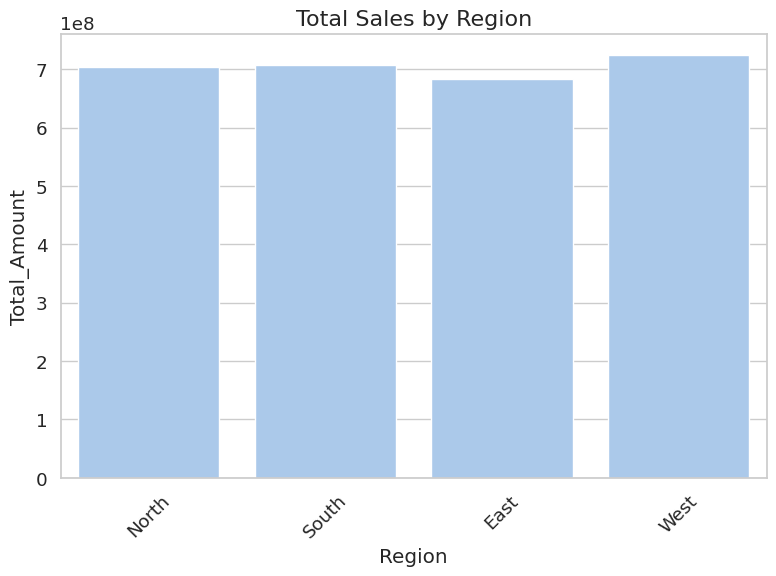

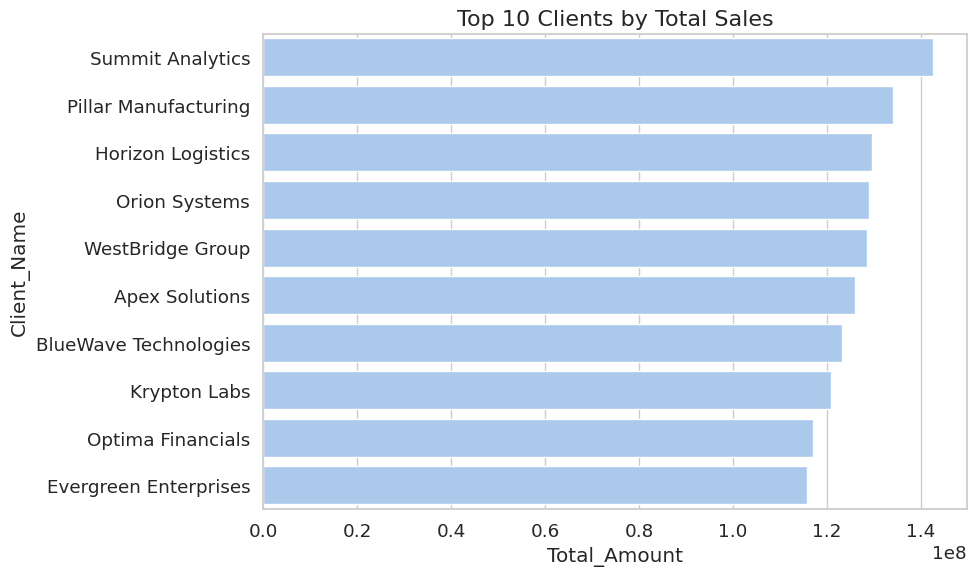

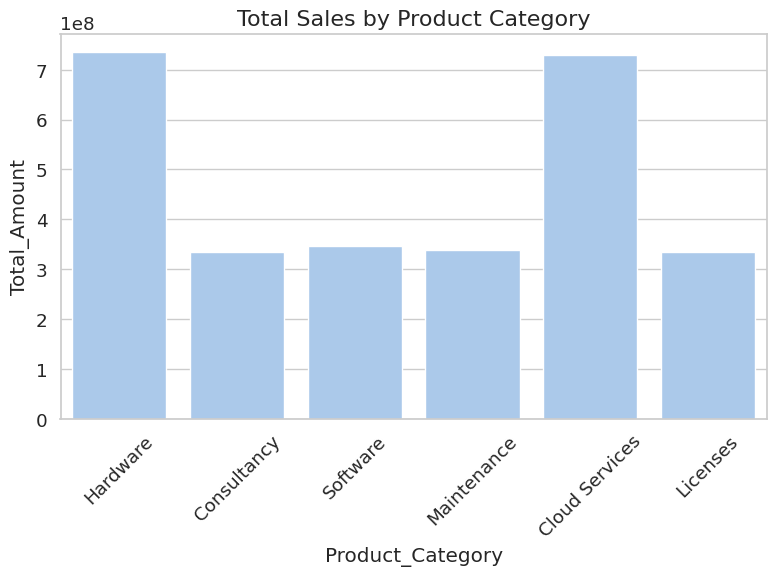

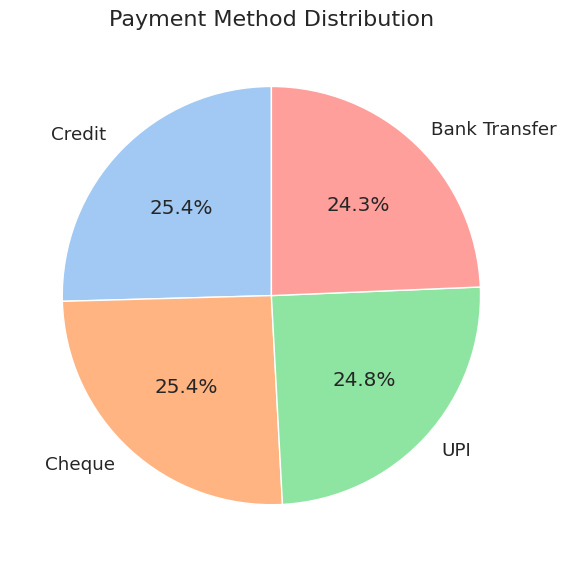

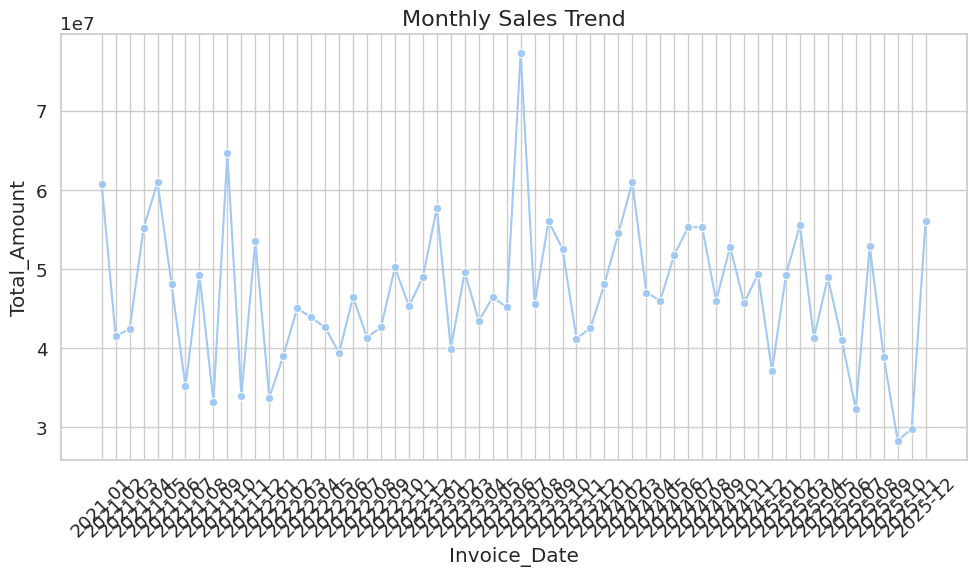

In [29]:
# --- Step 5: Data Visualization and Export Images ---
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Create images folder if not exists
os.makedirs("images", exist_ok=True)

# 1️⃣ Total Sales by Region
plt.figure(figsize=(8,6))
sns.barplot(data=data, x="Region", y="Total_Amount", estimator=sum, errorbar=None)
plt.title("Total Sales by Region", fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("images/1_sales_by_region.png")
plt.show()

# 2️⃣ Top 10 Clients by Total Sales
top_clients = data.groupby("Client_Name")["Total_Amount"].sum().nlargest(10).reset_index()
plt.figure(figsize=(10,6))
sns.barplot(data=top_clients, x="Total_Amount", y="Client_Name")
plt.title("Top 10 Clients by Total Sales", fontsize=16)
plt.tight_layout()
plt.savefig("images/2_top_clients.png")
plt.show()

# 3️⃣ Sales by Product Category
plt.figure(figsize=(8,6))
sns.barplot(data=data, x="Product_Category", y="Total_Amount", estimator=sum, errorbar=None)
plt.title("Total Sales by Product Category", fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("images/3_sales_by_category.png")
plt.show()

# 4️⃣ Payment Method Distribution
plt.figure(figsize=(6,6))
data["Payment_Method"].value_counts().plot.pie(autopct="%1.1f%%", startangle=90)
plt.title("Payment Method Distribution", fontsize=16)
plt.ylabel("")
plt.tight_layout()
plt.savefig("images/4_payment_methods.png")
plt.show()

# 5️⃣ Monthly Sales Trend
data["Invoice_Date"] = pd.to_datetime(data["Invoice_Date"], errors="coerce")
monthly_sales = data.groupby(data["Invoice_Date"].dt.to_period("M"))["Total_Amount"].sum().reset_index()
monthly_sales["Invoice_Date"] = monthly_sales["Invoice_Date"].astype(str)

plt.figure(figsize=(10,6))
sns.lineplot(data=monthly_sales, x="Invoice_Date", y="Total_Amount", marker="o")
plt.title("Monthly Sales Trend", fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("images/5_monthly_sales_trend.png")
plt.show()
